# Aircraft Risk Assessment for New Business Endeavour 

## Overview

In this project, we are going to use analytical skills to determine the lowest risk aircraft options for the company's expansion into the aviation industry. We will use Aviation_Data.csv from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023. We will evaluate and compare the risk levels of different aircraft models and give recommendations for aircraft models that present the lowest risk and highest potential for successful operation in either commercial or private sectors.

## Objectives

    1.The main objective is to determine the lowest-risk aircraft options for the company's expansion into the aviation industry, focusing on both commercial and private enterprises.

    2.Evaluate various aircraft models in terms of safety, reliability and market reputation.

    3.Initialize a customizable tool that the company can use to evaluate the risk of future aircraft purchases based
    on updated data.

    4.Prepare a presentation to the head of the aviation division summarizing the key findings and actionable insights.


# Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading and Inspecting the data

In [2]:
df = pd.read_csv('Aviation_Data.csv', dtype={6: 'object', 7: 'object', 28: 'object'})
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.shape

(90348, 31)

In [4]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning

Filling Null values and Dropping Columns with Null values exceeding 30% threshold

Find and Drop Duplicates

Treating Outliers

In [6]:
#There are 90348 entries in the dataset with a total of 31 columns.

#5 columns out of 31 have data as floats while the rest are in form of strings.

#There are missing values in most of the columns. ITS only 'Investigation.Type' column that doesn't contain null values.

In [7]:
percent_missing = df.isnull().mean() * 100
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                                   column_name  percent_missing
Investigation.Type          Investigation.Type         0.000000
Event.Id                              Event.Id         1.614867
Accident.Number                Accident.Number         1.614867
Event.Date                          Event.Date         1.614867
Location                              Location         1.672422
Make                                      Make         1.684597
Model                                    Model         1.716695
Amateur.Built                    Amateur.Built         1.727764
Country                                Country         1.865011
Injury.Severity                Injury.Severity         2.721698
Registration.Number        Registration.Number         3.072564
Aircraft.damage                Aircraft.damage         5.150086
Weather.Condition            Weather.Condition         6.586753
Total.Uninjured                Total.Uninjured         8.158454
Number.of.Engines            Number.of.E

Treating Null Values

In [8]:
#Drop Columns with a higher percentage of Missing values.
df = df.loc[:, df.isnull().mean() < 0.3]
df.head()
# df.shape

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980


In [9]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Report.Status              7840
Publication.Date          16689
dtype: int64

In [24]:
# df_cleaned = df.dropna(axis=0, subset=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Publication.Date'])
# df_cleaned.isnull().sum()

In [11]:

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Calculate mean for numerical columns
numerical_means = df[numerical_cols].mean()

# Calculate mode for categorical columns
categorical_modes = df[categorical_cols].mode().iloc[0]

# Fill missing values
df[numerical_cols] = df[numerical_cols].fillna(numerical_means)
df[categorical_cols] = df[categorical_cols].fillna(categorical_modes)

Dropping Duplicates

In [12]:
duplicates = df.duplicated().sum()
duplicates

1390

In [13]:
#Drop Duplicates
df= df.drop_duplicates()





Treating Outliers

In [15]:
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median = df[column].median()
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Apply the function to all numerical columns
for col in df.select_dtypes(include=['number']).columns:
    treat_outliers(df, col)



In [16]:
aviation_data = df.copy()
df.to_csv('cleaned_aviation_data.csv', index=False)
print(aviation_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88958 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88958 non-null  object 
 3   Event.Date              88958 non-null  object 
 4   Location                88958 non-null  object 
 5   Country                 88958 non-null  object 
 6   Injury.Severity         88958 non-null  object 
 7   Aircraft.damage         88958 non-null  object 
 8   Registration.Number     88958 non-null  object 
 9   Make                    88958 non-null  object 
 10  Model                   88958 non-null  object 
 11  Amateur.Built           88958 non-null  object 
 12  Number.of.Engines       88958 non-null  float64
 13  Engine.Type             88958 non-null  object 
 14  Purpose.of.flight       88958 non-null

#    A Bar Graph showing the Number of Accidents per Year

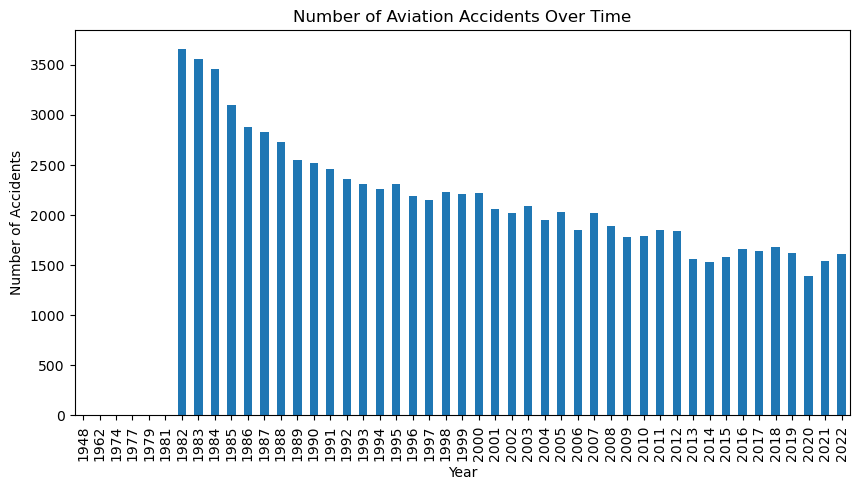

Plot saved as Number_of_Aviation_Accidents_Over_Time.PNG


In [17]:
#Standardize date format
aviation_data['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
aviation_data['Year'] = aviation_data['Event.Date'].dt.year

# Count accidents per year
accidents_per_year = aviation_data['Year'].value_counts().sort_index()
# accidents_per_year
# Plot the number of accidents over time
plt.figure(figsize=(10, 5))
accidents_per_year.plot(kind='bar')
plt.title('Number of Aviation Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
image_path = 'Number_of_Aviation_Accidents_Over_Time.PNG'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")


* From the above graph, 1982 is the year that had most occurences of accidents.

* However, the number of accidents tends to go down two decades later.

* The reduction of the accidents may be due to production of new models of aeroplanes.

#            A bar graph showing the top 20 Makes and Models with high number of accidents

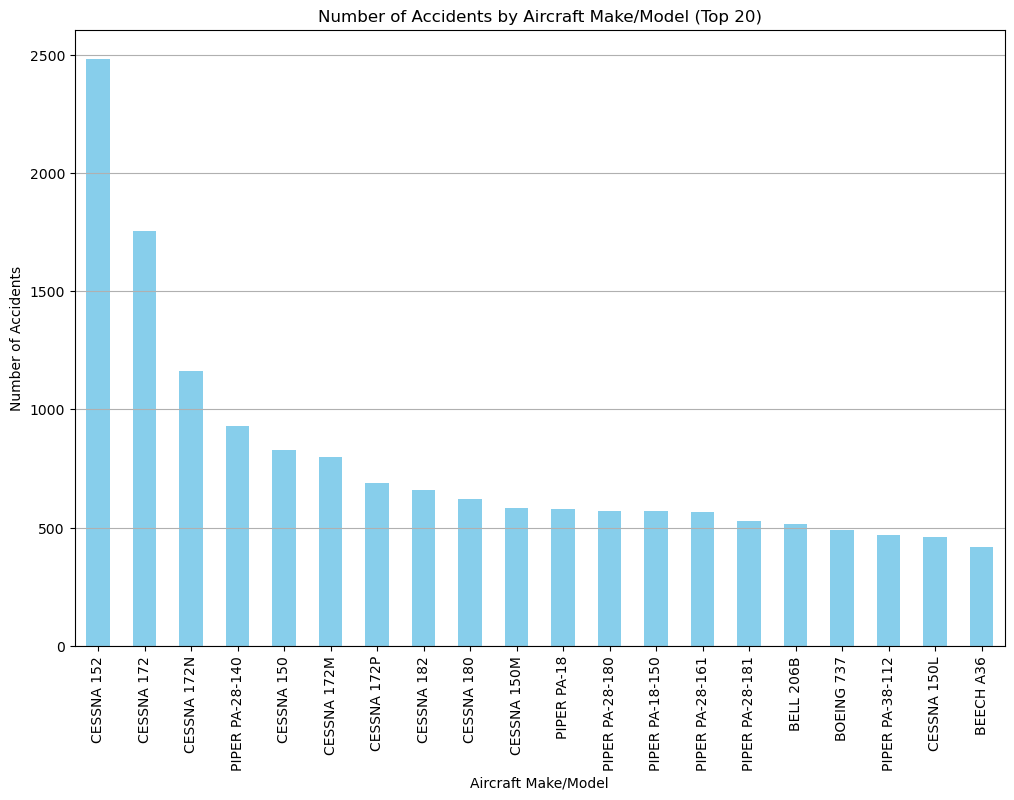

Plot saved as accidents_by_Model_Make.png


In [18]:
aviation_data['Make'] = aviation_data['Make'].str.upper()

aviation_data['Make_Model'] = aviation_data['Make'] + ' ' + aviation_data['Model']
# Count the number of accidents for each 'Make_Model'
accident_counts = aviation_data['Make_Model'].value_counts()

# Select the top 20 most frequent 'Make_Model' for better visualization
top_20_make_model = accident_counts.head(20)

# Plot the bar plot
plt.figure(figsize=(12, 8))
top_20_make_model.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Aircraft Make/Model (Top 20)')
plt.xlabel('Aircraft Make/Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y')
image_path = 'accidents_by_Model_Make.png'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")

* Cessna 152 has the highest number of accidents as seen in the above graph.

* Cessna has appeared severally in the top 20 Aircraft Makes with highest number of accidents.

* Let's investigate further.

# Top 10 Makes with Most Accidents

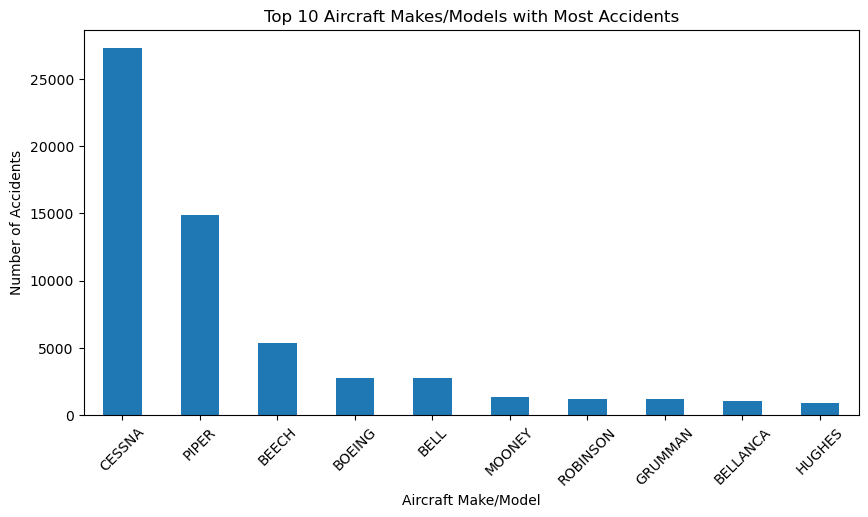

Plot saved as Top_10_Aircraft_Models_with_Most_Accidents.png


In [19]:
# Count the occurrences of each aircraft make/model
# import plotly.express as px
make_model_counts = aviation_data['Make'].value_counts().head(10)
# make_model_counts
# Plot the number of accidents by aircraft make/model
plt.figure(figsize=(10, 5))
make_model_counts.plot(kind='bar')
plt.title('Top 10 Aircraft Makes/Models with Most Accidents')
plt.xlabel('Aircraft Make/Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
image_path = 'Top_10_Aircraft_Models_with_Most_Accidents.png'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")


* From the above graph, we can conclude that the Aircraft make with highest number of Accidents is Cessna.

* This make has over 25000 accidents since 1948 to 2022 which is a very high number compared other makes.

* Let's see which make has the least number of accidents since 1948 to 2022

# 10 Makes with least number of accidents

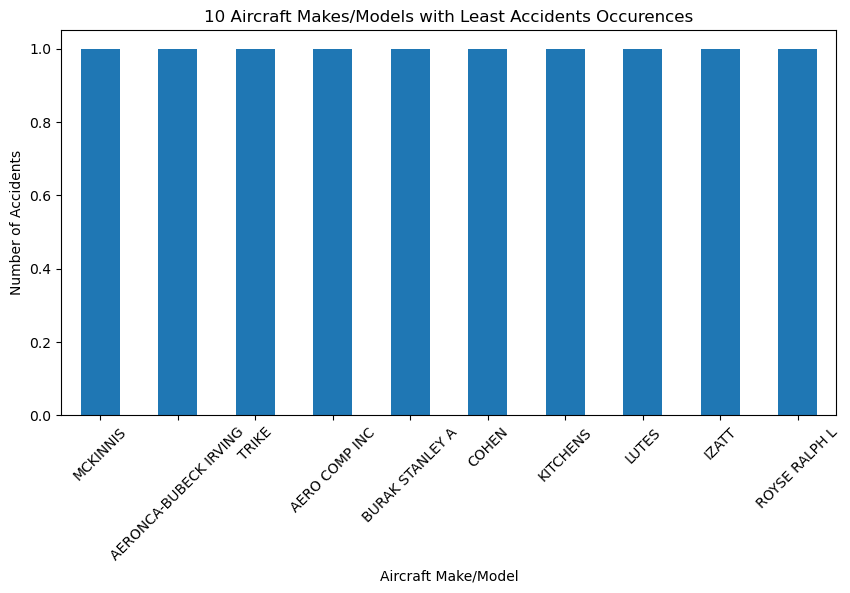

Plot saved as Makes_with_least_accidents.png


In [20]:
make_model_counts = aviation_data['Make'].value_counts().tail(10)
# Plot the number of accidents by aircraft make/model
plt.figure(figsize=(10, 5))
make_model_counts.plot(kind='bar')
plt.title('10 Aircraft Makes/Models with Least Accidents Occurences')
plt.xlabel('Aircraft Make/Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
image_path = 'Makes_with_least_accidents.png'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")

In [21]:
make_model_counts = aviation_data['Make'].value_counts()
makes_less_than_2 = make_model_counts[make_model_counts < 2]
makes_less_than_2.sum()

6133

* There are 6133 makes with accident occurences less than two.

* Mckinnis, Aeronca-Bubeck Irving, Trike and 6130 more have incidents below 2.

* The above graph gives 10 Aircraft makes with number of accidents less than 2.

<Figure size 1000x600 with 0 Axes>

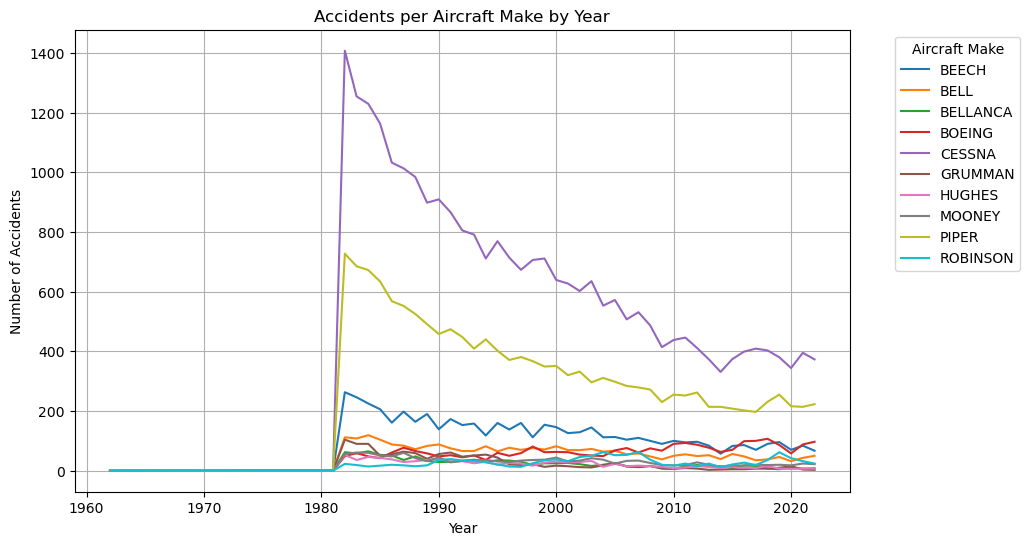

Plot saved as Accidents_per_Aircraft_Make_by_Year.png


In [31]:
aviation_data['Year'] = aviation_data['Event.Date'].dt.year
accidents_per_make_year = aviation_data.groupby(['Make', 'Year']).size().reset_index(name='Accidents')

top_makes = accidents_per_make_year.groupby('Make')['Accidents'].sum().nlargest(10).index
filtered_data = accidents_per_make_year[accidents_per_make_year['Make'].isin(top_makes)]

# Pivot the data for plotting
pivot_table = filtered_data.pivot(index='Year', columns='Make', values='Accidents').fillna(0)

# Plot the data
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Accidents per Aircraft Make by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Aircraft Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
image_path = 'Accidents_per_Aircraft_Make_by_Year.png'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")

# Number of Accidents as Per Weather Conditions

Plot saved as accidents_by_weather.png


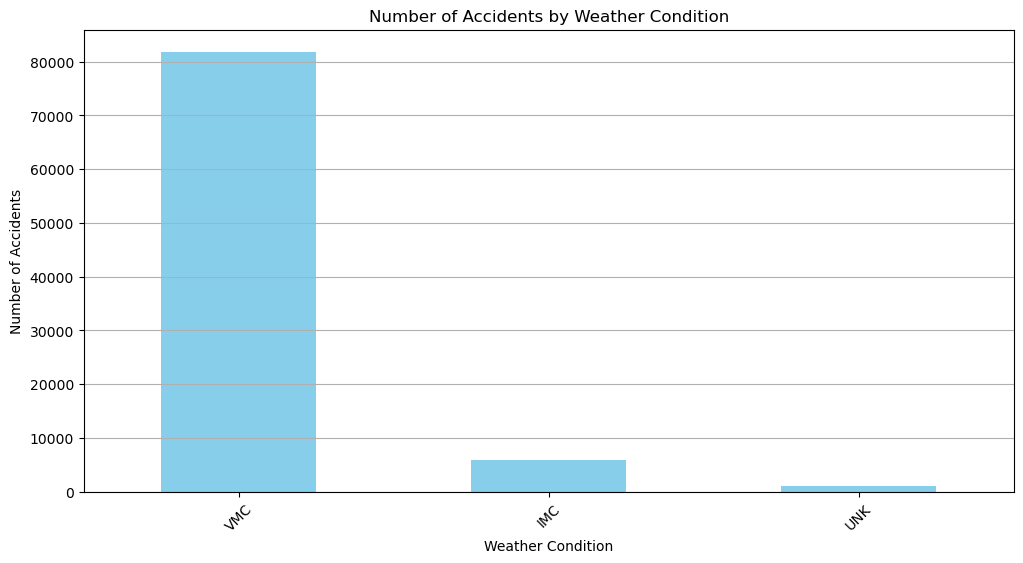

In [32]:
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].str.upper()

weather_condition_counts = aviation_data['Weather.Condition'].value_counts()

plt.figure(figsize=(12, 6))
weather_condition_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
image_path = 'accidents_by_weather.png'
plt.savefig(image_path, bbox_inches='tight')
print(f"Plot saved as {image_path}")
plt.show()

In aviation, instrument meteorological conditions (IMC) are weather conditions that require pilots to fly primarily by reference to flight instruments, and therefore under instrument flight rules (IFR), as opposed to flying by outside visual references under visual flight rules (VFR). Visual meteorological conditions (VMC) is an aviation flight category in which visual flight rules (VFR) flight is permitted—that is, conditions in which pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft. From the above graph, the number of accidents occuring from VMC are high compared to IMC weather conditions. This would mean that when there is sufficient visibility, that is under Visual Meteorological Conditions(VMC), the pilot is not required to apply the IFR(Instrument Flight Rules), the number of accidents go higher. However, when there is poor visibility due to poor weather conditions, that is under Instrument Meteorological Conditions(IMC), the pilots are required to apply the IFR and the number of accidents are less.



# Accident Severity Distribution

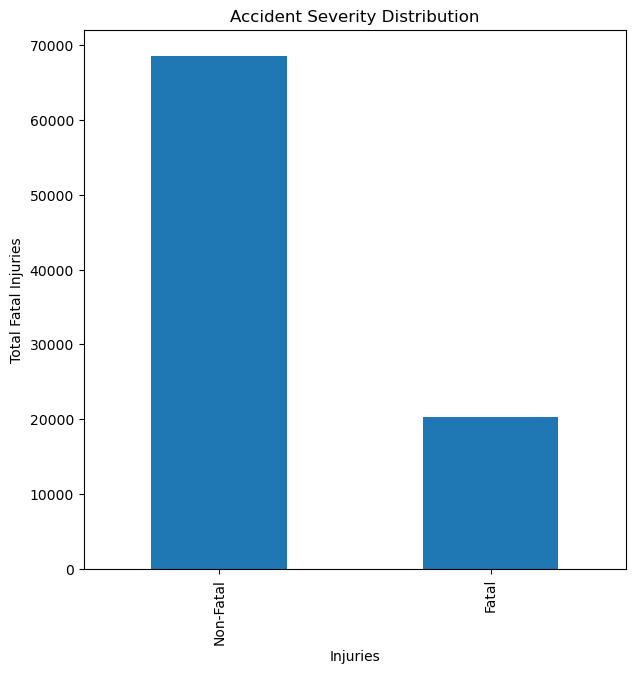

Plot saved as accidents_severity_distribution.png


In [33]:
# Count the occurrences of each severity type
severity_counts = aviation_data['Total.Fatal.Injuries'].apply(lambda x: 'Fatal' if x > 0 else 'Non-Fatal').value_counts()

# Plot the severity distribution
plt.figure(figsize=(7, 7))
severity_counts.plot(kind='bar')
plt.title('Accident Severity Distribution')
plt.xlabel('Injuries')
plt.ylabel('Total Fatal Injuries')
image_path = 'accidents_severity_distribution.png'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")

From the Fatal Total Injuries, the non_fatal injuries are more than the fatal injuries.

Lets investigate the relationship between Total Fatal Injuries with Total Uninjured and Total Serious Injuries using scatter plots.

# Satter Plots To Investigate Correlation Between the Injuries

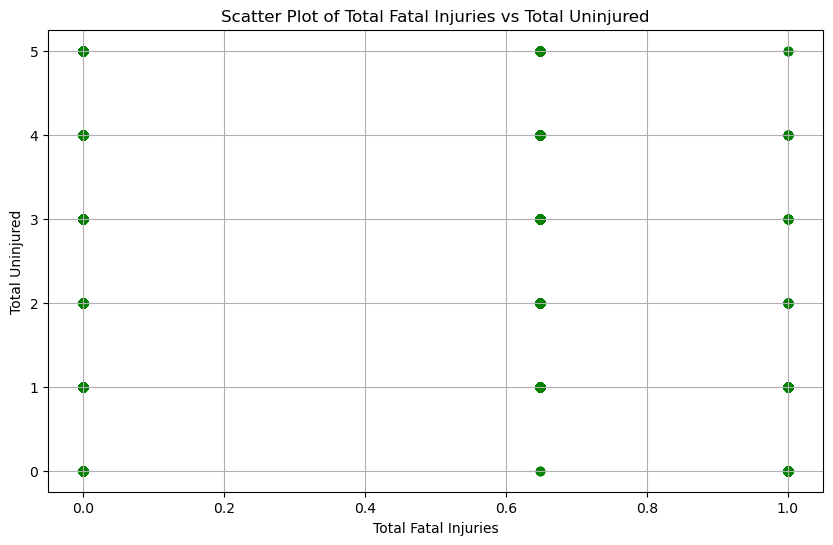

Plot saved as scatter_plot_of_fatal_injuries_vs_total_uninjured.png


In [24]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aviation_data['Total.Fatal.Injuries'], aviation_data['Total.Uninjured'], alpha=0.5, color='green')
plt.title('Scatter Plot of Total Fatal Injuries vs Total Uninjured')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Total Uninjured')
plt.grid(True)
image_path = 'scatter_plot_of_fatal_injuries_vs_total_uninjured.png'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")

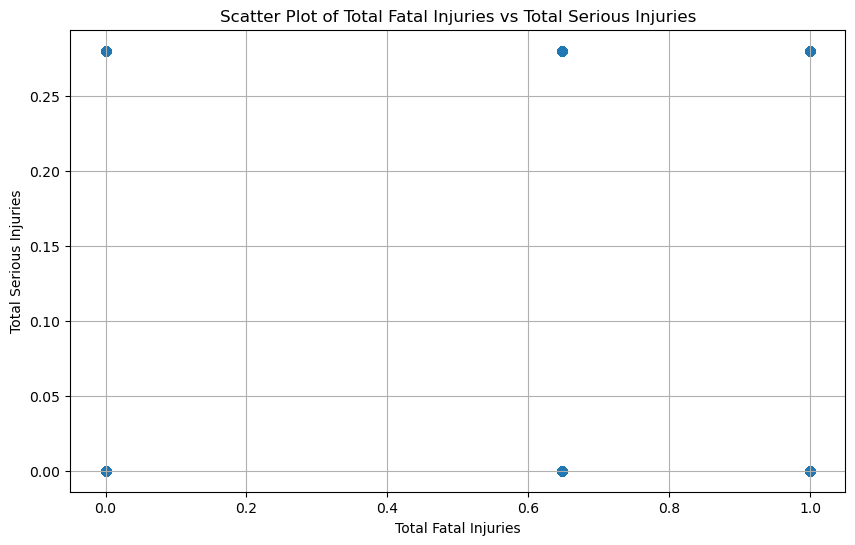

Plot saved as scatter_plot_of_fatal_injuries_vs_total_serious.png


In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(aviation_data['Total.Fatal.Injuries'], aviation_data['Total.Serious.Injuries'], alpha=0.5)
plt.title('Scatter Plot of Total Fatal Injuries vs Total Serious Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Total Serious Injuries')
plt.grid(True)
image_path = 'scatter_plot_of_fatal_injuries_vs_total_serious.png'
plt.savefig(image_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {image_path}")

From the above scatter plots, there is no correlation between Total Fatal Injuries and Total Uninjured.

There is also no correlation between Total Fatal Injuries.